<a href="https://colab.research.google.com/github/florenciarouco/tallerDeGit/blob/main/labo04_nro_de_condicion.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Laboratorio N°5: Número de Condición**


In [4]:
import numpy as np
import matplotlib.pyplot as plt

## Ejercicio 1

En este ejercicio vamos a probar o refutar algunas propiedades sobre el numero de condicion.
En cada item tendremos un propiedad que puede ser verdadera o falsa.
 - En caso de ser verdadera: dar su demostracion.
 - En caso de ser falsa: utilizar numpy para dar un contraejemplo.

Utilizar el comando `np.linalg.cond`.

**(a)** $Cond_2(A)$ + $Cond_2(B)$ = $Cond_2(A+B)$

In [ ]:
A = np.array([[1,2,3],[4,5,6],[7,8,9]])
B = np.array([[10,11,12],[13,14,15],[16,17,18]])

print(np.linalg.cond(A) + np.linalg.cond(B))
print(np.linalg.cond(A + B))

6.241621766312493e+17
4.6573401274897896e+16


**(b)** $Cond_1(A)$ - $Cond_1(B)$ = $Cond_2(A-B)$

In [ ]:
A = np.array([[1,2,3],[4,5,6],[7,8,9]])
B = np.array([[10,11,12],[13,14,15],[16,17,18]])

print(np.linalg.cond(A,1) - np.linalg.cond(B,1))
print(np.linalg.cond(A - B))

-inf
inf


**(c)** $Cond_2(A)$ * $Cond_2(B)$ = $Cond_2(A.B)$

In [5]:
A = np.array([[1,2,3],[4,5,6],[7,8,9]])
B = np.array([[10,11,12],[13,14,15],[16,17,18]])

print(np.linalg.cond(A) * np.linalg.cond(B))
print(np.linalg.cond(A * B))

2.2346212641162703e+34
4798.530272281449


## Ejercicio 2

El objetivo de este ejercicio es estudiar el número de condición de
algunas matrices a medida que su tamaño aumenta.



**(a)** Programar funciones que, dado $n \in \mathbb{N}$, devuelvan las siguientes matrices de $\mathbb{R}^{n\times n}$. La función que define $B_n$ ya viene dada.


\begin{equation*}
A_n=
\begin{pmatrix}
\frac{1}{n} & 0 & 0 & \cdots  & n^2\\
0 & \frac{1}{n} & 0 & \cdots & 0 \\
0 & 0 & \frac{1}{n} & \cdots & 0\\
\vdots & \vdots & \vdots  & \ddots & \vdots\\
1 & 0 & 0 & \cdots &  \frac{1}{n}\\
\end{pmatrix}
\qquad
B_n=
\begin{pmatrix}
4 & 1 & 0 & \cdots & 0 & 0\\
1 & 4 & 1 & \cdots & 0 & 0 \\
0 & 1 & 4 & \ddots &  & \vdots\\
\vdots & \vdots & \ddots & \ddots & \ddots & \vdots \\
0 & 0 &  & \ddots & 4 & 1\\
0 & 0 & \cdots & \cdots & 1 & 4 \\
\end{pmatrix}
\qquad
H_n=
\begin{pmatrix}
1 & \frac{1}{2} & \frac{1}{3} & \cdots  & \frac{1}{n}\\
\frac{1}{2} & \frac{1}{3} & \frac{1}{4} & \cdots & \frac{1}{n+1} \\
\frac{1}{3} & \frac{1}{4} & \frac{1}{5} & \cdots & \frac{1}{n+2}\\
\vdots & \vdots & \vdots  & \ddots & \vdots\\
\frac{1}{n} & \frac{1}{n+1} & \frac{1}{n+2} & \cdots &  \frac{1}{2n-1}\\
\end{pmatrix}
\end{equation*}



**Sugerencia:** Utilizar la función `np.diag` que recibe un array de números y genera una matriz diagonal con elementos dados por el array.




In [18]:
def matriz_B(n):
  B = np.eye(n, k=-1) + 4*np.eye(n, k=0) + np.eye(n, k=1)
  return B

#print(matriz_B(5))


def matriz_A(n) :
    A = (1/n)*np.eye(n , k= 0) + np.eye(n , k = -n+1) +(n*n)*np.eye(n , k = n-1)
    return A


print(matriz_A(5))

def diagonal(n):
    a = []
    for j in range (1,n+1):
        l = []
        for i in range(j, n+1):
            l.append(1/(2*i-j))
        a.append(l)
    return a
#print(diagonal(3))

def matriz_H(n):
    a = diagonal(n)
    res = np.diag(a[0])
    for k in range(1, len(a)):
        res += np.diag(a[k], k=k) + np.diag(a[k], k = -k)
    return res


#print (matriz_H(4))

[[ 0.2  0.   0.   0.  25. ]
 [ 0.   0.2  0.   0.   0. ]
 [ 0.   0.   0.2  0.   0. ]
 [ 0.   0.   0.   0.2  0. ]
 [ 1.   0.   0.   0.   0.2]]


**(b)** Graficar para 100 vectores **unitarios** (en norma 2), $v\in\mathbb{R^2}$, $\; A_2v,\ B_2v,\ H_2v$

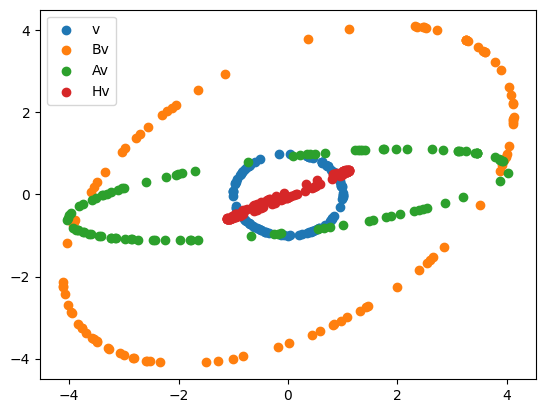

In [20]:
A = matriz_A(2)
B = matriz_B(2)
H = matriz_H(2)
V = np.random.rand(2, 100) - 0.5

norms = 1/np.linalg.norm(V, axis = 0)



V = V * norms
BV = B @ V
AV = A @ V
HV = H @ V


plt.scatter(V[0], V[1], label = "v")
plt.scatter(BV[0], BV[1], label = "Bv")
plt.scatter(AV[0], AV[1], label = "Av")
plt.scatter(HV[0], HV[1], label = "Hv")
plt.legend()


**(c)** Programar una función que, dada una matriz $M_n$ y un número natural $N$, guarde en un vector el valor de $Cond_2(M_n)$ para $1\leq n \leq N$.

In [21]:
def vector_condicion(M, N):
    condiciones = []
    for n in range(1, N + 1):
        matriz = M(n)
        cond = np.linalg.cond(matriz, 2)
        condiciones.append(cond)
    return np.array(condiciones)

print(vector_condicion(matriz_H, 4))

[1.00000000e+00 1.92814701e+01 5.24056778e+02 1.55137387e+04]


**(d)** Realizar gráficos del número de condición en norma 2 de las matrices definidas arriba para $N=10$.


In [ ]:
x= #COMPLETAR
y= #COMPLETAR

plt.plot(x, y)
plt.show()

**Sugerencia:** Si es necesario, utilizar una escala logarítmica en el eje $y$.

**(e)** Repetir el ítem (d) para la matriz de Hilbert con $N=50$. ¿Cómo se explica el comportamiento observado?

In [ ]:
#COMPLETAR

## Ejercicio 3 (Ej 20 - Práctica 2)

Sea
$A=\left(
\begin{array}{ccc}
3&0 & 0\\
0& \frac 54 & \frac 34\\
0& \frac 34 & \frac 54\\
\end{array}
\right).$



In [ ]:
A = np.array([[3.0, 0, 0], [0, 5/4, 3/4], [0, 3/4, 5/4]])

(a) Calcular $Cond_\infty(A)$.


In [ ]:
#COMPLETAR

(b) ¿Cuán chico debe ser el error relativo en los datos, $\frac{\|b-\tilde{b}\|}{\|b\|}$, si se desea que el error relativo en la aproximación de la solución, $\frac{\|x-\tilde{x}\|}{\|x\|}, $ sea menor que $10^{-4}$ (en $\|\cdot\|_{\infty}$)?



In [ ]:
#COMPLETAR

(c) Realizar experimentos numéricos para verificar las estimaciones del ítem anterior. Considerar $b=(3,2,2)^t$, que se corresponde con la solución exacta $x=(1,1,1)^t$. Generar vectores de error aleatorios, normalizarlos para que su norma sea tan chica como la estimada en el item anterior y perturbar $b$ obteniendo $\tilde{b}$. Finalmente, resolver $A\tilde{x}=\tilde{b}$ y verificar que $\|\tilde{x}-x\|<10^{-4}$.

In [ ]:
#COMPLETAR